In [1]:
import pandas as pd
import time

import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib as mpl

In [2]:
df = pd.read_feather('../data/annotated_data.feather')
print(df[df['4 - 1. Economic instruments']>=0.5].shape[0] / df.shape[0])
df[df['4 - 2. Regulatory Instruments']>=0.5].shape[0] / df.shape[0]

0.49095187669137547


0.14701729615248854

In [3]:
pol_df = pd.read_csv('../data/policy_database.csv')
pol_df[pol_df['Economic instruments']>0].shape[0] / pol_df.shape[0]
#pol_df

0.34831778343228725

In [4]:
cdf = pd.read_csv('../data/country_studies.csv')
cdf.head()

,country_code3,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training","4 - 4. Governance, strategies and targets",4 - 5. Agreements,8 - 01. AFOLU,8 - 02. Buildings,8 - 03. Industry,8 - 04. Energy,8 - 05. Transport,8 - 06. Waste,8 - 15. Cross-sectoral,continent
0,AFG,13,4,0,0,6,3,2,0,0,7,1,0,3,Asia
1,AGO,2,1,0,0,1,0,1,0,0,1,0,0,0,Africa
2,ALA,2,0,0,0,2,0,0,0,0,1,0,0,1,Europe
3,ALB,3,0,1,0,2,0,1,0,0,2,0,0,0,Europe
4,ARE,0,0,0,0,0,0,0,0,0,0,0,0,0,Asia


In [5]:
cdf_pol = pd.read_csv('../data/pdb_countries.csv')
new_cols = [x for x in cdf_pol.columns if x not in ["country_code3", "n_policies"]]
print(new_cols)
cdf_pol.head()

['Economic instruments', 'Regulatory Instruments', 'Information, education and training', 'Governance, strategies and targets', 'Agreements', 'AFOLU', 'Buildings', 'Energy', 'Industry', 'Transport', 'Waste', 'Cross-sectoral']


,country_code3,n_policies,Economic instruments,Regulatory Instruments,"Information, education and training","Governance, strategies and targets",Agreements,AFOLU,Buildings,Energy,Industry,Transport,Waste,Cross-sectoral
0,AFG,9,2,0,2,7,1,2,0,6,0,1,1,3
1,AGO,22,1,2,3,22,2,4,3,9,4,3,1,10
2,ALB,9,0,1,0,9,2,1,1,7,4,1,0,4
3,AND,25,7,11,4,10,0,0,10,20,1,5,1,4
4,ARE,39,14,9,3,20,0,1,8,16,6,8,1,9


,country_code3,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training","4 - 4. Governance, strategies and targets",4 - 5. Agreements,8 - 01. AFOLU,8 - 02. Buildings,8 - 03. Industry,...,"Information, education and training","Governance, strategies and targets",Agreements,AFOLU,Buildings,Energy,Industry,Transport,Waste,Cross-sectoral
0,AFG,13,4,0,0,6,3,2,0,0,...,2,7,1,2,0,6,0,1,1,3
1,AGO,2,1,0,0,1,0,1,0,0,...,3,22,2,4,3,9,4,3,1,10
2,ALB,3,0,1,0,2,0,1,0,0,...,0,9,2,1,1,7,4,1,0,4
3,ARE,0,0,0,0,0,0,0,0,0,...,3,20,0,1,8,16,6,8,1,9
4,ARG,25,9,6,4,6,4,5,1,1,...,9,41,3,16,11,31,15,25,0,14


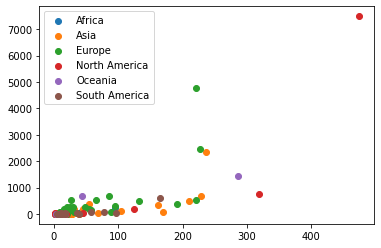

In [6]:
df = cdf.merge(cdf_pol)

import pycountry_convert as pc
def get_cont(x):
    continents = {
        'NA': 'North America',
        'SA': 'South America', 
        'AS': 'Asia',
        'OC': 'Oceania',
        'AF': 'Africa',
        'EU': 'Europe'
    }
    try:
        return continents[pc.country_alpha2_to_continent_code(pc.country_alpha3_to_country_alpha2(x))]
    except:
        return None

df["continent"] = df['country_code3'].apply(lambda x: get_cont(x))
fig, ax = plt.subplots()

for continent, group in df.groupby("continent"):
    ax.scatter(group["n_policies"], group["INCLUDE"], label=continent)

ax.legend()
df.head()


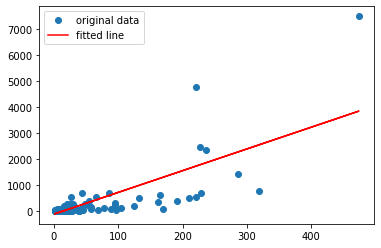

In [7]:
from scipy import stats
x = df["n_policies"]
y = df["INCLUDE"]

res = stats.linregress(x, y)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

plt.legend()
plt.show()

In [8]:
df["prediction"] = res.intercept + res.slope*x
df["error"] = abs(df["prediction"] - df["INCLUDE"])
df.head()

,country_code3,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training","4 - 4. Governance, strategies and targets",4 - 5. Agreements,8 - 01. AFOLU,8 - 02. Buildings,8 - 03. Industry,...,Agreements,AFOLU,Buildings,Energy,Industry,Transport,Waste,Cross-sectoral,prediction,error
0,AFG,13,4,0,0,6,3,2,0,0,...,1,2,0,6,0,1,1,3,-56.326846,69.326846
1,AGO,2,1,0,0,1,0,1,0,0,...,2,4,3,9,4,3,1,10,52.577169,50.577169
2,ALB,3,0,1,0,2,0,1,0,0,...,2,1,1,7,4,1,0,4,-56.326846,59.326846
3,ARE,0,0,0,0,0,0,0,0,0,...,0,1,8,16,6,8,1,9,194.990110,194.990110
4,ARG,25,9,6,4,6,4,5,1,1,...,3,16,11,31,15,25,0,14,680.869559,655.869559


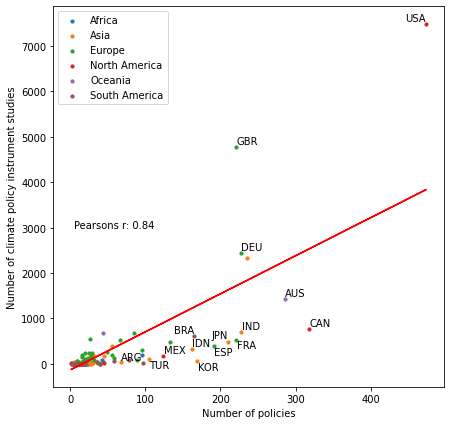

In [9]:
from scipy.stats import pearsonr

r = pearsonr(group["n_policies"], group["INCLUDE"])

from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(7,7))

for continent, group in df.groupby("continent"):
    ax.scatter(group["n_policies"], group["INCLUDE"], label=continent, s=10)

ax.legend()

texts = []

for i, row in df.sort_values("error", ascending = False).head(15).iterrows():
    texts.append(ax.text(row["n_policies"], row["INCLUDE"], row["country_code3"]))
    
adjust_text(texts)
    
ax.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

ax.set_xlabel("Number of policies")
ax.set_ylabel("Number of climate policy instrument studies")

ax.text(5,3000, f"Pearsons r: {r[0]:.2f}")

plt.savefig("../figures/density_correlation.pdf")

,country_code3,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training","4 - 4. Governance, strategies and targets",4 - 5. Agreements,8 - 01. AFOLU,8 - 02. Buildings,8 - 03. Industry,...,AFOLU,Buildings,Energy,Industry,Transport,Waste,Cross-sectoral,prediction,error,density_ratio
0,TUR,104,39,19,7,51,32,13,8,5,...,21,25,36,19,23,2,17,747.887414,643.887414,0.990476
1,MEX,174,80,29,1,89,41,26,9,7,...,20,34,48,13,25,2,22,907.054820,733.054820,1.403226
2,IDN,325,159,48,8,147,70,128,11,4,...,44,27,56,19,34,3,18,1225.389631,900.389631,2.006173
3,ESP,391,167,89,18,179,82,48,46,32,...,7,40,75,9,59,4,33,1468.329356,1077.329356,2.047120
4,ZAF,206,121,21,5,62,42,9,11,9,...,11,21,27,19,24,0,23,664.115096,458.115096,2.168421


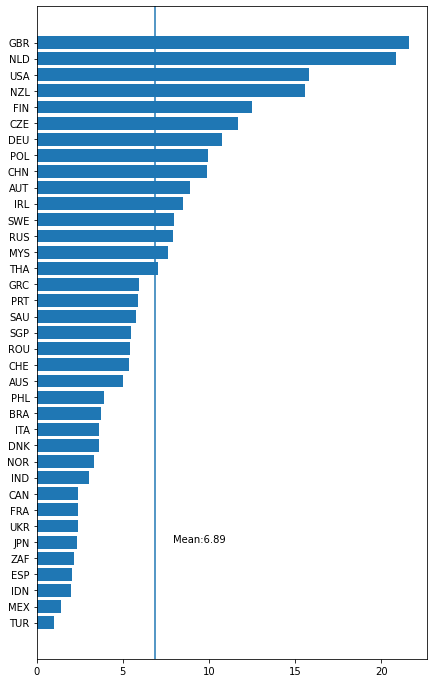

In [10]:
df['density_ratio'] = df['INCLUDE'] / df['n_policies']

pdf = df[df['INCLUDE']>100].sort_values('density_ratio').reset_index(drop=True)


fig, ax = plt.subplots(figsize=(7,12))

mean = pdf['density_ratio'].mean()
ax.axvline(mean)
ax.text(mean+1, 5, f"Mean:{mean:.2f}")

ax.barh(pdf.index, pdf['density_ratio'])
ax.set_yticks(pdf.index)
ax.set_yticklabels(pdf.country_code3)

plt.savefig("../figures/density_ratios.pdf")


pdf.head()

In [11]:
for i, row in pdf.iterrows():
    with open(f"../results/density_ratios/{row['country_code3']}.tex", "w") as f:
        f.write(f"{row['density_ratio']:.2f}")
        
with open(f"../results/density_ratios/mean.tex", "w") as f:
    f.write(f"{pdf['density_ratio'].mean():.2f}")
    
with open(f"../results/density_ratios/median.tex", "w") as f:
    f.write(f"{pdf['density_ratio'].median():.2f}")

,country_code3,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training","4 - 4. Governance, strategies and targets",4 - 5. Agreements,8 - 01. AFOLU,8 - 02. Buildings,8 - 03. Industry,...,AFOLU,Buildings,Energy,Industry,Transport,Waste,Cross-sectoral,prediction,error,density_ratio
0,CHE,262,124,46,14,145,66,31,62,22,...,5,11,14,8,11,0,10,278.762429,16.762429,5.346939
1,NOR,314,169,61,9,130,56,57,42,24,...,2,19,25,11,36,1,17,664.115096,350.115096,3.305263
2,IDN,325,159,48,8,147,70,128,11,4,...,44,27,56,19,34,3,18,1225.389631,900.389631,2.006173
3,THA,386,169,33,13,203,74,68,23,21,...,8,9,21,8,18,3,13,329.025820,56.974180,7.018182
4,ESP,391,167,89,18,179,82,48,46,32,...,7,40,75,9,59,4,33,1468.329356,1077.329356,2.047120


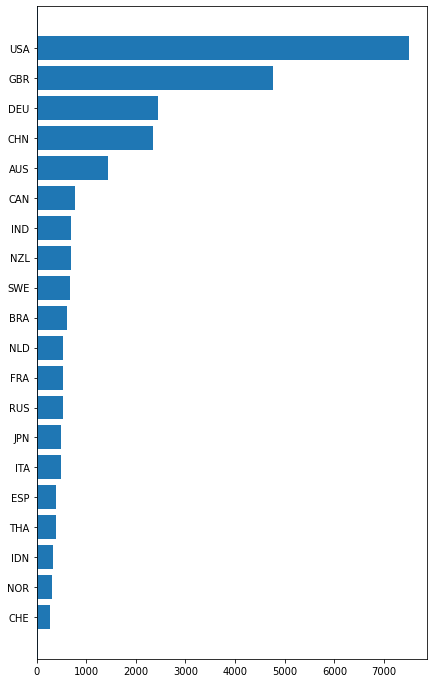

In [12]:
fig, ax = plt.subplots(figsize=(7,12))

ax.axvline(pdf['density_ratio'].mean())

pdf = pdf.sort_values("INCLUDE").tail(20).reset_index(drop=True)

ax.barh(pdf.index, pdf['INCLUDE'])
ax.set_yticks(pdf.index)
ax.set_yticklabels(pdf.country_code3)

pdf.head()

In [13]:
import re

cols = [x for x in df.columns if re.match("4 -",x)]
m = df.groupby("continent")[cols].sum()
m

,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training","4 - 4. Governance, strategies and targets",4 - 5. Agreements
continent,,,,,
Africa,286,57,11,235,128
Asia,2685,674,175,2570,1213
Europe,5215,2405,560,7152,2647
North America,3957,1980,319,2643,2298
Oceania,1189,291,98,698,478
South America,436,125,29,380,275


In [14]:
new_cols = [x.split(". ")[1] for x in cols]

def EMD(p, q):
    x = np.array(p) - np.array(q)
    #y = np.cumsum(x, axis=0)
    return abs(x).sum() / 2

country_dist = []

for i, row in df.iterrows():
    r = {"country": row["country_code3"]}
    if row[cols].sum() == 0 or row[new_cols].sum() == 0:
        continue
    study_instruments = row[cols] / row[cols].sum()
    pol_instruments = row[new_cols] / row[new_cols].sum()
    for j, c in enumerate(new_cols):
        r[cols[j]] = study_instruments.iloc[j]
        r[new_cols[j]] = pol_instruments.iloc[j]
        try:
            r[f"study_over_representation_{c}"] = study_instruments.iloc[j] / pol_instruments.iloc[j]
        except ZeroDivisionError:
            pass
        #r[f"log_study_over_representation_{c}"] = np.log(study_instruments[j] / pol_instruments[j])
        
    r["enacted_policies"] = row["n_policies"]
    r["n_studies"] = row["INCLUDE"]
    r["emd"] = EMD(study_instruments, pol_instruments)
    country_dist.append(r)
    
country_dist_df = pd.DataFrame.from_dict(country_dist).sort_values("emd").reset_index(drop=True)
country_dist_df.to_csv("../data/country_polices.csv", index=False)
country_dist_df.head()



,country,4 - 1. Economic instruments,Economic instruments,study_over_representation_Economic instruments,4 - 2. Regulatory Instruments,Regulatory Instruments,"4 - 3. Information, education and training","Information, education and training","study_over_representation_Information, education and training","4 - 4. Governance, strategies and targets","Governance, strategies and targets","study_over_representation_Governance, strategies and targets",4 - 5. Agreements,Agreements,study_over_representation_Agreements,enacted_policies,n_studies,emd,study_over_representation_Regulatory Instruments
0,SDN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,3,1,0.000000,NaN
1,KOR,0.250000,0.246696,1.013393,0.130435,0.220264,0.065217,0.070485,0.925272,0.423913,0.405286,1.045959,0.130435,0.057269,2.277592,169,72,0.095097,0.592174
2,GAB,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.100000,0.000000,1.000000,0.900000,1.111111,0.000000,0.000000,NaN,9,1,0.100000,NaN
3,PRT,0.271930,0.261905,1.038278,0.114035,0.190476,0.017544,0.047619,0.368421,0.447368,0.428571,1.043860,0.149123,0.071429,2.087719,28,164,0.106516,0.598684
4,BGR,0.244444,0.224490,1.088889,0.088889,0.163265,0.022222,0.061224,0.362963,0.622222,0.530612,1.172650,0.022222,0.020408,1.088889,36,31,0.113379,0.544444


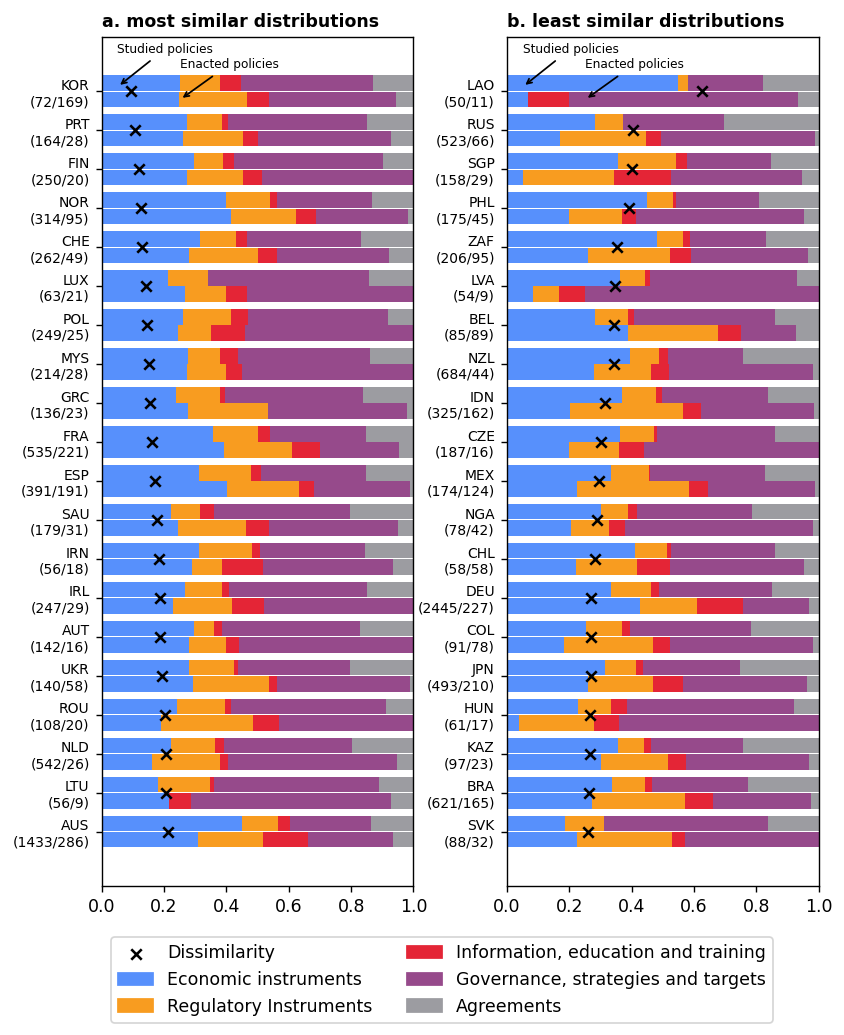

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (7.4,9), dpi=125, )
plt.subplots_adjust(wspace=0.3)


CB_colors = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]

mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_colors)

ax = axs[0]

def plot_differences(df, ax, title):
    left_s = 0
    left_p = 0
    
    df = df.reset_index(drop=True)

    for i, col in enumerate(cols):
        ax.barh(df.index+0.21, df[col], left=left_s, height=0.4, color=f"C{i}")
        left_s += df[col]
        ax.barh(df.index-0.21, df[new_cols[i]], left=left_p, height=0.4, color=f"C{i}")
        left_p += df[new_cols[i]]

    ax.set_yticks(df.index)
    ax.set_yticklabels(df.country + "\n(" + df.n_studies.astype(str) + '/' + df.enacted_policies.astype(str) + ')', fontsize=8)

    ax.scatter(df.emd, df.index, zorder=5, color="black", marker="x")
    ax.set_title(title, fontsize=10, loc='left', fontweight='bold')
    ax.annotate(
        "Studied policies", (0.05, df.index.max()+0.11), (0.05,df.index.max()+1),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
        fontsize=7
    )
    ax.annotate(
        "Enacted policies", (0.25, df.index.max()-0.22), (0.25,df.index.max()+0.6),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
        fontsize=7
    )
    
min_policies = 5
min_studies = 50

sub_df = country_dist_df[
    (country_dist_df["enacted_policies"]>=min_policies) & 
    (country_dist_df["n_studies"]>=min_studies)   
]

plot_differences(
    sub_df.head(20).sort_values("emd", ascending=False), 
    axs[0], "a. most similar distributions"
)
    
plot_differences(
    sub_df.tail(20), 
    axs[1], "b. least similar distributions"
)

handles = [plt.scatter([],[],color="black", marker="x")]
labels = ["Dissimilarity"] + new_cols
handles += [plt.Rectangle((0,0),1,1, color=f"C{i}") for i, label in enumerate(new_cols)]
plt.legend(handles, labels, bbox_to_anchor=(0.88,-0.05), ncol=2)

plt.savefig("../figures/policy_mix_comparison_bycountry.pdf", bbox_inches="tight")

#fig.tight_layout()

In [16]:
places = pd.read_feather('../data/places.feather')
df = pd.read_feather('../data/annotated_data.feather')


In [17]:
pol_df[pol_df['Governance, strategies and targets']==1]

,Id,"Information, education and training",Economic instruments,"Governance, strategies and targets",Regulatory Instruments,Agreements,AFOLU,Buildings,Energy,Industry,Transport,Waste,Cross-sectoral,policy_id,Geography ISO,CCLW,NCI,continent
0,4620.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0.0,0,NaN,AFG,1,0,Asia
3,9527.0,1.0,0.0,1.0,0.0,1.0,0,0,1,0,0,0.0,0,NaN,AFG,1,0,Asia
4,9528.0,0.0,1.0,1.0,0.0,0.0,1,0,1,0,0,1.0,1,NaN,AFG,1,0,Asia
5,9636.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0.0,0,NaN,AFG,1,0,Asia
6,9637.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0.0,0,NaN,AFG,1,0,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7060,211003601.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,NaN,1,211003601.0,DNK,0,1,Europe
7062,211004614.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,0,NaN,0,211004614.0,BGR,0,1,Europe
7064,211001490.0,0.0,0.0,1.0,1.0,0.0,0,0,1,0,1,NaN,0,211001490.0,IND,0,1,Asia
7065,211003176.0,0.0,0.0,1.0,1.0,0.0,1,0,0,0,0,NaN,0,211003176.0,ARG,0,1,South America


4 - 1. Economic instruments
0.49095187669137547 0.34831778343228725
1.4094941459881454
Africa
0.48835403726708076 0.19154557463672392
2.549544870421932
Asia
0.47353878852284803 0.30976253298153034
1.5287155097969285
Europe
0.3744606819763396 0.45779543197616684
0.8179650905643686
North America
0.4501784882818563 0.37256637168141593
1.2083175576211345
Oceania
0.5370809346427362 0.3347921225382932
1.6042221381158852
South America
0.4644082332761578 0.3394495412844037
1.3681215520838161
4 - 2. Regulatory Instruments
0.14701729615248854 0.2839977381962115
0.517670658527976
Africa
0.0986024844720497 0.13738441215323646
0.7177123148590541
Asia
0.11147715196599363 0.30184696569920844
0.36931678841880755
Europe
0.15323590814196242 0.2894736842105263
0.529360409944961
North America
0.21069377619121527 0.3088495575221239
0.6821890174672586
Oceania
0.13748730104977988 0.23194748358862144
0.5927518545259378
South America
0.13379073756432247 0.3321100917431193
0.4028505633842859
4 - 3. Information,

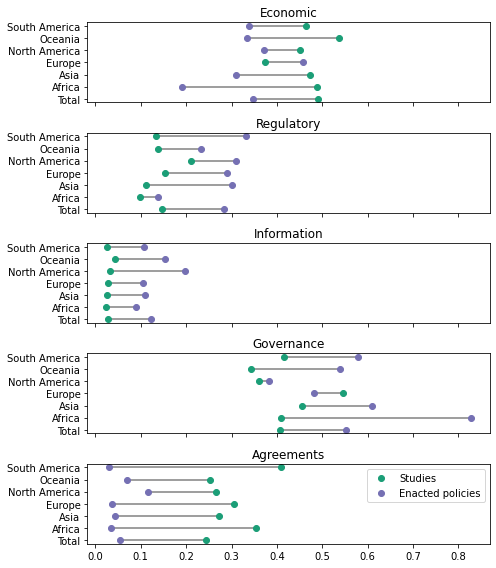

In [18]:

fig, axs = plt.subplots(len(cols), figsize=(7,8), sharex=True)
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#1b9e77','#7570b3'])
for i, c in enumerate(cols):
    
    print(c)
    
    ax = axs[i]
    studies = df[df[c]>=0.5].shape[0] / df.shape[0]
    pols = pol_df[new_cols[i]].sum() / pol_df.shape[0]
    ax.scatter(studies, 0, label="Studies", color="C0")
    ax.scatter(pols, 0, label="Enacted policies", color="C1")
    ax.set_title(new_cols[i].split()[0].split(',')[0], fontsize=12)
    ax.plot([studies, pols], [0, 0], color="grey", zorder=-5)
    
    print(studies, pols)
    
    print(studies/pols)
    
    xticks = ["Total"]
    for j, (name, group) in enumerate(places.groupby("continent")):

        xticks.append(name)
        sub_df = df[df['id'].isin(group['doc_id'])]
        studies = sub_df[sub_df[c]>=0.5].shape[0] / sub_df.shape[0]
        sub_pol_df = pol_df[pol_df['continent']==name]
        pols = sub_pol_df[new_cols[i]].sum() / sub_pol_df.shape[0]
        
        print(name)
        print(studies, pols)
        print(studies/pols)
        ax.scatter(studies, j+1, color="C0")
        ax.scatter(pols, j+1, color="C1")
        ax.plot([studies, pols], [j+1, j+1], color="grey", zorder=-5)
        
    ax.set_yticks(range(len(xticks)))
    ax.set_yticklabels(xticks, )
    ax.tick_params(labelsize=10)
    
plt.legend()

fig.tight_layout()

plt.savefig("../figures/policy_mix_comparison_regional.pdf", bbox_inches="tight")



In [19]:
sectors = [x for x in df.columns if "8 - " in x]
sectors

['8 - 01. AFOLU',
 '8 - 02. Buildings',
 '8 - 03. Industry',
 '8 - 04. Energy',
 '8 - 05. Transport',
 '8 - 06. Waste',
 '8 - 15. Cross-sectoral']

4 - 1. Economic instruments
1.4094941459881454
South America
1.829279517381574
South America
0.5399948893861843
South America
2.153002079867342
South America
1.1547871139282417
South America
0.9370429741540217
South America
0.765144227098508
South America
2.617165339904713
4 - 2. Regulatory Instruments
0.517670658527976
South America
0.42989552188273095
South America
0.6903168668298314
South America
0.24068949390188732
South America
0.49623557036671667
South America
0.799280677677346
South America
0.6360723841712435
South America
0.5942712222902489
4 - 3. Information, education and training
0.23139634074597012
South America
0.13776378154946806
South America
0.5142282565042606
South America
0.025594845517731214
South America
0.11025517082256295
South America
0.3063374250642306
South America
0.15249025958785145
South America
0.08713109817305761
4 - 4. Governance, strategies and targets
0.7374770312981007
South America
0.45461443525163414
South America
1.406201235721169
South America
0.55

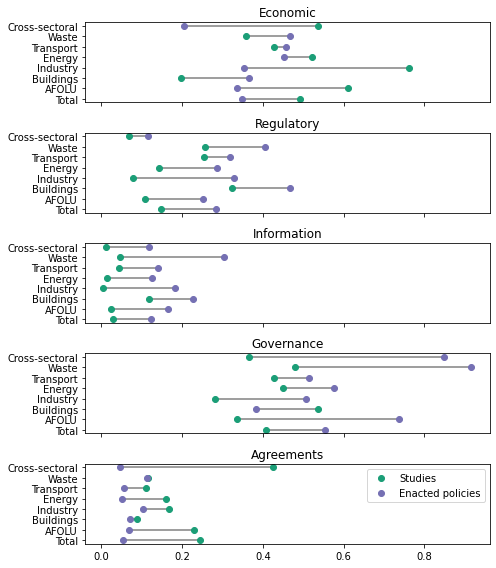

In [20]:
fig, axs = plt.subplots(len(cols), figsize=(7,8), sharex=True)
for i, c in enumerate(cols):
    
    print(c)
    
    ax = axs[i]
    studies = df[df[c]>=0.5].shape[0] / df.shape[0]
    pols = pol_df[new_cols[i]].sum() / pol_df.shape[0]
    ax.scatter(studies, 0, label="Studies", color="C0")
    ax.scatter(pols, 0, label="Enacted policies", color="C1")
    ax.set_title(new_cols[i].split()[0].split(',')[0], fontsize=12)
    ax.plot([studies, pols], [0, 0], color="grey", zorder=-5)
    
    print(studies/pols)
    
    xticks = ["Total"]
    for j, sector in enumerate(sectors):
        s = sector.split('.')[1].strip()
        xticks.append(s)
        sub_df = df[df[sector]>=0.5]
        studies = sub_df[sub_df[c]>=0.5].shape[0] / sub_df.shape[0]
        sub_pol_df = pol_df[pol_df[s]>=0.5]
        pols = sub_pol_df[new_cols[i]].sum() / sub_pol_df.shape[0]
        
        print(name)
        print(studies/pols)
        ax.scatter(studies, j+1, color="C0")
        ax.scatter(pols, j+1, color="C1")
        ax.plot([studies, pols], [j+1, j+1], color="grey", zorder=-5)
        
    ax.set_yticks(range(len(xticks)))
    ax.set_yticklabels(xticks, )
    ax.tick_params(labelsize=10)
    
plt.legend()

fig.tight_layout()

plt.savefig("../figures/policy_mix_comparison_sector.pdf", bbox_inches="tight")



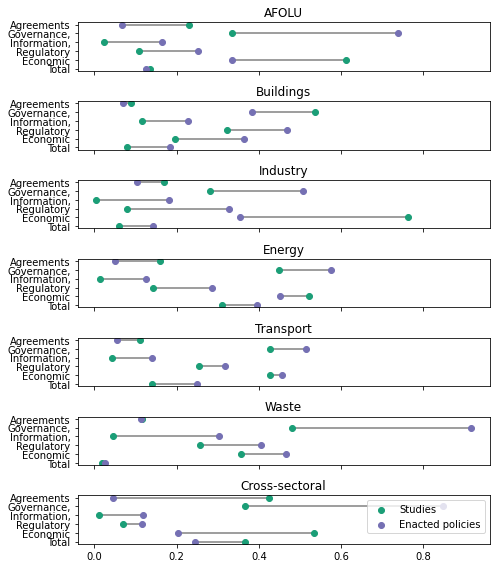

In [21]:
fig, axs = plt.subplots(len(sectors), figsize=(7,8), sharex=True)
for i, sector in enumerate(sectors):
    s = sector.split('.')[1].strip()
    
    ax = axs[i]
    studies = df[df[sector]>=0.5].shape[0] / df.shape[0]
    pols = pol_df[s].sum() / pol_df.shape[0]
    ax.scatter(studies, 0, label="Studies", color="C0")
    ax.scatter(pols, 0, label="Enacted policies", color="C1")
    ax.set_title(s.split()[0].split(',')[0], fontsize=12)
    ax.plot([studies, pols], [0, 0], color="grey", zorder=-5)
    
    xticks = ["Total"]
    for j, col in enumerate(cols):
        
        xticks.append(new_cols[j].split()[0])
        sub_df = df[df[sector]>=0.5]
        studies = sub_df[sub_df[col]>=0.5].shape[0] / sub_df.shape[0]
        sub_pol_df = pol_df[pol_df[s]>=0.5]
        pols = sub_pol_df[new_cols[j]].sum() / sub_pol_df.shape[0]
        

        ax.scatter(studies, j+1, color="C0")
        ax.scatter(pols, j+1, color="C1")
        ax.plot([studies, pols], [j+1, j+1], color="grey", zorder=-5)
        
    ax.set_yticks(range(len(xticks)))
    ax.set_yticklabels(xticks, )
    ax.tick_params(labelsize=10)
    
plt.legend()

fig.tight_layout()

plt.savefig("../figures/policy_mix_comparison_sector_ii.pdf", bbox_inches="tight")



1.4094941459881454
Africa
2.549544870421932
Asia
1.5287155097969285
Europe
0.8179650905643686
North America
1.2083175576211345
Oceania
1.6042221381158852
South America
1.3681215520838161
0.517670658527976
Africa
0.7177123148590541
Asia
0.36931678841880755
Europe
0.529360409944961
North America
0.6821890174672586
Oceania
0.5927518545259378
South America
0.4028505633842859


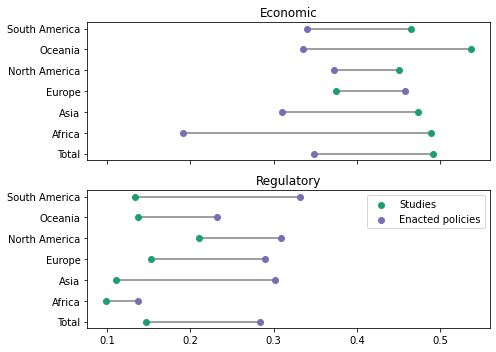

In [22]:
fig, axs = plt.subplots(len(cols[:2]), figsize=(7,5), sharex=True)
for i, c in enumerate(cols[:2]):
    ax = axs[i]
    studies = df[df[c]>=0.5].shape[0] / df.shape[0]
    pols = pol_df[new_cols[i]].sum() / pol_df.shape[0]
    ax.scatter(studies, 0, label="Studies", color="C0")
    ax.scatter(pols, 0, label="Enacted policies", color="C1")
    ax.set_title(new_cols[i].split()[0].split(',')[0])
    ax.plot([studies, pols], [0, 0], color="grey", zorder=-5)
    
    print(studies/pols)
    
    xticks = ["Total"]
    for j, (name, group) in enumerate(places.groupby("continent")):

        xticks.append(name)
        sub_df = df[df['id'].isin(group['doc_id'])]
        studies = sub_df[sub_df[c]>=0.5].shape[0] / sub_df.shape[0]
        sub_pol_df = pol_df[pol_df['continent']==name]
        pols = sub_pol_df[new_cols[i]].sum() / sub_pol_df.shape[0]
        
        print(name)
        print(studies/pols)
        ax.scatter(studies, j+1, color="C0")
        ax.scatter(pols, j+1, color="C1")
        ax.plot([studies, pols], [j+1, j+1], color="grey", zorder=-5)
        
    ax.set_yticks(range(len(xticks)))
    ax.set_yticklabels(xticks, )
    
plt.legend()

plt.savefig("../figures/policy_mix_comparison_regional_subset.pdf", bbox_inches="tight")

fig.tight_layout()

In [23]:
for  j, (name, group) in enumerate(places.groupby("continent")):
    print(name)

Africa
Asia
Europe
North America
Oceania
South America


Text(0, 0.5, 'Distance between studies and policy')

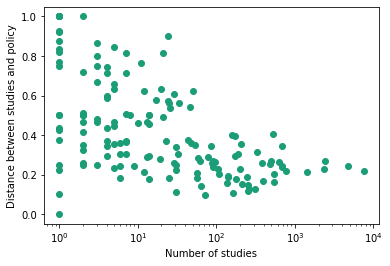

In [24]:
fig, ax = plt.subplots()

ax.scatter(country_dist_df.n_studies, country_dist_df.emd)
ax.set_xscale('log')
ax.set_xlabel('Number of studies')
ax.set_ylabel('Distance between studies and policy')

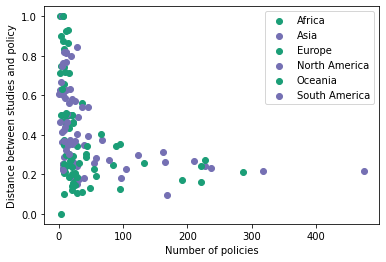

In [25]:
fig, ax = plt.subplots()

country_dist_df['continent'] = country_dist_df['country'].apply(lambda x: get_cont(x))

for continent, group in country_dist_df.groupby("continent"):
    ax.scatter(group.enacted_policies, group.emd, label=continent)
    
ax.set_xlabel('Number of policies')
ax.set_ylabel('Distance between studies and policy')
ax.legend()

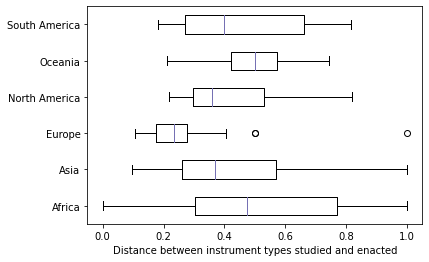

In [26]:
fig, ax = plt.subplots()

labels, data = zip(*country_dist_df.groupby('continent')['emd'])

ax.boxplot(data, vert=False)
ax.set_yticklabels(labels)
ax.set_xlabel("Distance between instrument types studied and enacted")

plt.savefig("../figures/distance_continent.pdf", bbox_inches="tight")